# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Содержание:

<a href='#step1'>1. Знакомство с данными.</a>

<a href='#step1.1'>1.1 Общая информация.</a>

<a href='#step1.2'>1.2 Поиск дубликатов.</a>

<a href='#step1.3'>1.3 Общие выводы по данным.</a>

<a href='#step2'>2. Обработка данных.</a>

<a href='#step2.1'>2.1 Корретировка заголовков.</a>

<a href='#step2.2'>2.2 Наведем порядок с городами.</a>

<a href='#step2.3'>2.3 Посмотрим категори квартир.</a>

<a href='#step2.4'>2.4 Дополнительные шаги по предобрабоке.</a>
    
<a href='#step3'> 3 Анализ данных.</a>

<a href='#step3.1'> 3.1 Форматирование данных.</a>

<a href='#step3.2'> 3.2 Цена квадратного метра.</a>

<a href='#step4'> 4 Визуальный анализ данных.</a>

<a href='#step5'> 5 Общие выводы.</a>

# Шаг 1. Откройте файл с данными и изучите общую информацию. 
<a id='step1'></a>

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pprint
from pymystem3 import Mystem
from collections import Counter

Приступим к осмотру датасета:

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

<a id='step1.1'></a>
Начало:

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


Окончание:

In [4]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,"3,550,000.00",35.30,2018-02-28T00:00:00,1,2.86,15.00,16.30,4,NaN,False,False,9.10,2.00,Санкт-Петербург,"17,284.00","16,081.00",1.00,353.00,2.00,652.00,29.00
23690,3,"5,500,000.00",52.00,2018-07-19T00:00:00,2,nan,5.00,31.00,2,NaN,False,False,6.00,nan,Санкт-Петербург,"20,151.00","6,263.00",1.00,300.00,0.00,nan,15.00
23691,11,"9,470,000.00",72.90,2016-10-13T00:00:00,2,2.75,25.00,40.30,7,NaN,False,False,10.60,1.00,Санкт-Петербург,"19,424.00","4,489.00",0.00,nan,1.00,806.00,519.00
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,nan,5.00,17.50,4,NaN,False,False,6.00,nan,Тихвин,nan,nan,nan,nan,nan,nan,413.00
23693,9,"4,600,000.00",62.40,2016-08-05T00:00:00,3,2.60,9.00,40.00,8,NaN,False,False,8.00,0.00,Петергоф,"45,602.00","34,104.00",1.00,352.00,1.00,675.00,239.00
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,nan,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,nan
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,nan,5.00,38.00,4,NaN,False,False,8.50,nan,Тосно,nan,nan,nan,nan,nan,nan,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,nan,3.00,29.70,1,NaN,False,False,nan,nan,село Рождествено,nan,nan,nan,nan,nan,nan,nan
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,nan,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,nan,поселок Новый Учхоз,nan,nan,nan,nan,nan,nan,nan


Рандомные данные:

In [5]:
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19086,8,"4,950,000.00",87.20,2018-07-12T00:00:00,4,2.60,9.00,59.00,2,NaN,False,False,nan,4.00,Всеволожск,nan,nan,nan,nan,nan,nan,63.00
5942,1,"2,400,000.00",43.22,2019-04-29T00:00:00,2,nan,17.00,12.00,4,NaN,False,False,20.00,nan,Мурино,nan,nan,nan,nan,nan,nan,nan
23490,0,"1,800,000.00",64.00,2018-02-07T00:00:00,3,nan,9.00,nan,6,NaN,False,False,nan,nan,Тихвин,nan,nan,nan,nan,nan,nan,45.00
18661,16,"3,200,000.00",39.50,2017-05-03T00:00:00,1,2.55,10.00,18.50,1,False,False,False,10.30,2.00,посёлок Парголово,"61,517.00","21,565.00",0.00,nan,0.00,nan,45.00
10520,1,"2,600,000.00",32.00,2018-03-06T00:00:00,1,2.70,18.00,10.00,7,NaN,False,False,15.00,2.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,134.00
19831,14,"3,540,000.00",44.50,2018-02-18T00:00:00,2,2.50,5.00,27.20,1,NaN,False,False,7.20,nan,Санкт-Петербург,"24,106.00","11,675.00",0.00,nan,0.00,nan,80.00
15889,16,"2,650,000.00",31.00,2016-02-25T00:00:00,1,2.76,5.00,21.00,2,NaN,False,False,nan,0.00,Петергоф,"40,114.00","32,795.00",0.00,nan,0.00,nan,313.00
606,5,"790,000.00",38.60,2018-04-03T00:00:00,2,3.00,2.00,24.00,1,NaN,False,False,6.00,nan,поселок городского типа Синявино,nan,nan,nan,nan,nan,nan,374.00
12431,11,"3,000,000.00",73.00,2019-04-01T00:00:00,3,2.50,5.00,44.20,2,NaN,False,False,8.50,2.00,поселок Семрино,nan,nan,nan,nan,nan,nan,nan
21971,12,"8,000,000.00",60.00,2019-01-26T00:00:00,2,3.40,5.00,41.00,4,NaN,False,False,10.00,nan,Санкт-Петербург,"18,983.00","3,409.00",0.00,nan,1.00,237.00,60.00


Основные статистические данные:

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Общее инфо:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<a id='step1.2'></a>
Посчитаем дубликаты:

In [8]:
df.duplicated().sum()

0

<a id='step1.3'></a>
### Вывод

- данные довольно "гряные";
- отсутствую много значений;
- некачественные названия столбцов;
- неверные типы данных;
- нелогичная группировка столбцов между собой;
- разобратся с "апартаментами".

<a id='step2'></a>
# Шаг 2. Предобработка данных

Приведем названия столбцов в порядок, поработаем с признаками:

<a id='step2.1'></a>
Выведем заголовки:

In [9]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [10]:
cols = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'number_of_rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'town_name',
        'nearest_airport_distance_m',
        'city_center_distance_m',
        'parks_numbers_within_3km',
        'nearest_park_distance_m',
        'ponds_number_within_3km',
        'nearest_pond_distance_m',
        'days_exposition']
df.set_axis(cols, axis='columns', inplace=True)

Посмотрим на новые столбцы:

In [11]:
df.columns.tolist()

['total_images',
 'last_price',
 'total_area_m2',
 'first_day_exposition',
 'number_of_rooms',
 'ceiling_height_m',
 'total_floors_in_house',
 'living_area_m2',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_m2',
 'number_of_balconies',
 'town_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_numbers_within_3km',
 'nearest_park_distance_m',
 'ponds_number_within_3km',
 'nearest_pond_distance_m',
 'days_exposition']

Посчитаем по категориям:

In [12]:
df.isnull().sum().sort_values()

total_images                      0
is_open_plan                      0
floor                             0
number_of_rooms                   0
is_studio                         0
total_area_m2                     0
last_price                        0
first_day_exposition              0
town_name                        49
total_floors_in_house            86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_number_within_3km        5518
parks_numbers_within_3km       5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
number_of_balconies           11519
nearest_pond_distance_m       14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

Пропуски выглядят некритично.
Взглянем в процентах:

In [13]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images                  0.00
is_open_plan                  0.00
floor                         0.00
number_of_rooms               0.00
is_studio                     0.00
total_area_m2                 0.00
last_price                    0.00
first_day_exposition          0.00
town_name                     0.21
total_floors_in_house         0.36
living_area_m2                8.03
kitchen_area_m2               9.61
days_exposition              13.42
ponds_number_within_3km      23.28
parks_numbers_within_3km     23.28
city_center_distance_m       23.29
nearest_airport_distance_m   23.38
ceiling_height_m             38.80
number_of_balconies          48.61
nearest_pond_distance_m      61.56
nearest_park_distance_m      65.91
is_apartment                 88.29
dtype: float64

Посмотрим на данные:

In [14]:
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<a id='step2.2'></a>
Наведем порядок с городами:

In [15]:
df['town_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

Заменим 'ё' и 'е':

In [16]:
df['town_name'] = df['town_name'].str.replace('ё', 'е', regex=True)

Проверим корректировку:

In [17]:
len(df['town_name'].unique())

331

In [18]:
df['town_name'].isna().sum()

49

Удалим сроки без городов:

In [19]:
df = df.dropna(subset=['town_name'])
df['town_name'].isna().sum()

0

<a id='step2.3'></a>
Посмотрим категори студии, апартаменты и открытые планировки:

In [20]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Nan заменим на False, так как объекты жилового фонда:

In [21]:
df['is_apartment'] = df['is_apartment'].fillna(0)

Переведем булев тип к цифровому для простого расчета и на будущию обработку:

In [22]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [23]:
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,0,False,False,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,0,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,0,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Теперь для студий:

In [24]:
df['is_studio'].unique()

array([False,  True])

In [25]:
df['is_studio'].value_counts()

False    23501
True       149
Name: is_studio, dtype: int64

In [26]:
df['is_studio'] = df['is_studio'].map({True: 1, False: 0})

In [27]:
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,0,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,0,0,False,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,0,0,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,0,0,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,0,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Теперь для открытой планировки:

In [28]:
df['is_open_plan'].unique()

array([False,  True])

In [29]:
df['is_open_plan'].value_counts()

False    23583
True        67
Name: is_open_plan, dtype: int64

In [30]:
df['is_open_plan'] = df['is_open_plan'].map({True: 1, False: 0})

In [31]:
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,0,0,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,0,0,0,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,0,0,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Теперь 1 и 0 в трех столбцах.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images                  23650 non-null int64
last_price                    23650 non-null float64
total_area_m2                 23650 non-null float64
first_day_exposition          23650 non-null object
number_of_rooms               23650 non-null int64
ceiling_height_m              14490 non-null float64
total_floors_in_house         23565 non-null float64
living_area_m2                21752 non-null float64
floor                         23650 non-null int64
is_apartment                  23650 non-null int64
is_studio                     23650 non-null int64
is_open_plan                  23650 non-null int64
kitchen_area_m2               21381 non-null float64
number_of_balconies           12137 non-null float64
town_name                     23650 non-null object
nearest_airport_distance_m    18116 non-null float64
city_center_distance_m        18139 non-null float64
park

Разберемся с балконами:

In [33]:
df['number_of_balconies'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

продолжим с балконами:

In [34]:
df['number_of_balconies'] = df['number_of_balconies'].fillna(0)
print('Количество NaN в столбце number_of_balconies:', df['number_of_balconies'].isnull().sum())

Количество NaN в столбце number_of_balconies: 0


посмотрим пропуски в nearest_airport_distance_m и city_center_distance_m

In [35]:
print('Количество NaN по nearest_airport_distance_m:', df['nearest_airport_distance_m'].isnull().sum())
print('Количество NaN по city_center_distance_m:', df['city_center_distance_m'].isnull().sum())

Количество NaN по nearest_airport_distance_m: 5534
Количество NaN по city_center_distance_m: 5511


Да уж прийдется покопатся

Нужен список уникальных городов, где отсутствуют данные в столбцах nearest_airport_distance_m и city_center_distance_m

In [36]:
list_of_cities_NaN_airport_center = df.query('nearest_airport_distance_m != nearest_airport_distance_m and city_center_distance_m != city_center_distance_m')['town_name'].unique()

In [37]:
print(list_of_cities_NaN_airport_center)

['городской поселок Янино-1' 'поселок Мурино' 'Сертолово'
 'деревня Кудрово' 'Коммунар' 'поселок городского типа Красный Бор'
 'Гатчина' 'деревня Федоровское' 'Выборг' 'Кировск'
 'деревня Новое Девяткино' 'Санкт-Петербург'
 'поселок городского типа Лебяжье' 'поселок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'деревня Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'деревня Куттузи' 'поселок Аннино'
 'поселок городского типа Ефимовский' 'поселок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'поселок Первомайское' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино' 'Кудрово'
 'поселок Романовка' 'поселок Бугры' 'поселок городского типа Рощино'
 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'село Павлово' 'поселок Оредеж'
 'село Копорье' 'Тихвин' 'поселок Побе

заполняем пропуски расстояния до аэропорта по среднемму значению расстояния в зависимости от района:

In [38]:
grouped_airpots_nearest=df.groupby('town_name')['nearest_airport_distance_m'].transform('mean') 
df['nearest_airport_distance_m'].fillna(grouped_airpots_nearest,inplace=True)
df['nearest_airport_distance_m'].isnull().sum()


4864

остальные пропуски расстояния до аэропорта  заполняем просто по среднемму значению расстояния:

In [39]:
df['nearest_airport_distance_m']=df['nearest_airport_distance_m'].fillna(df['nearest_airport_distance_m'].mean()) 

заполним пропуски расстояния до центра по среднемму значению расстояния в зависимости от района:

In [40]:
df['city_center_distance_m'].fillna(df.groupby('town_name')['city_center_distance_m'].transform('mean'),inplace=True)
df['city_center_distance_m']=df['city_center_distance_m'].fillna(df['city_center_distance_m'].mean())
df['city_center_distance_m'].isnull().sum()

0

заполним средними значениями parks_numbers_within_3km, nearest_park_distance_m, ponds_number_within_3km, nearest_pond_distance_m:

In [41]:
df['parks_numbers_within_3km']=df['parks_numbers_within_3km'].fillna(df['parks_numbers_within_3km'].mean())
df['parks_numbers_within_3km'].isnull().sum()


0

In [42]:
df['nearest_park_distance_m']=df['nearest_park_distance_m'].fillna(df['nearest_park_distance_m'].mean())
df['nearest_park_distance_m'].isnull().sum()

0

In [43]:
df['ponds_number_within_3km']=df['ponds_number_within_3km'].fillna(df['ponds_number_within_3km'].mean())
df['ponds_number_within_3km'].isnull().sum()

0

In [44]:
df['nearest_pond_distance_m']=df['nearest_pond_distance_m'].fillna(df['nearest_pond_distance_m'].mean())
df['nearest_pond_distance_m'].isnull().sum()

0

заполним медианой значений kitchen_area_m2 так как заполнени по среднему не совсем корректно в виду разброса значений:

In [45]:
df['kitchen_area_m2']=df['kitchen_area_m2'].fillna(df['kitchen_area_m2'].median())
df['kitchen_area_m2'].isnull().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images                  23650 non-null int64
last_price                    23650 non-null float64
total_area_m2                 23650 non-null float64
first_day_exposition          23650 non-null object
number_of_rooms               23650 non-null int64
ceiling_height_m              14490 non-null float64
total_floors_in_house         23565 non-null float64
living_area_m2                21752 non-null float64
floor                         23650 non-null int64
is_apartment                  23650 non-null int64
is_studio                     23650 non-null int64
is_open_plan                  23650 non-null int64
kitchen_area_m2               23650 non-null float64
number_of_balconies           23650 non-null float64
town_name                     23650 non-null object
nearest_airport_distance_m    23650 non-null float64
city_center_distance_m        23650 non-null float64
park

In [47]:
print('Количество NaN по nearest_airport_distance_m:', df['nearest_airport_distance_m'].isnull().sum())
print('Количество NaN по city_center_distance_m:', df['city_center_distance_m'].isnull().sum())

Количество NaN по nearest_airport_distance_m: 0
Количество NaN по city_center_distance_m: 0


<a id='step3'></a>
# Шаг 3. Посчитайте и добавьте в таблицу

In [48]:
df['number_of_balconies'].value_counts().sort_values()

3.00       81
4.00      182
5.00      304
2.00     3658
1.00     4187
0.00    15238
Name: number_of_balconies, dtype: int64

<a id='step3.1'></a>
Отформатируем дату публикации объявления:

In [49]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04,1,nan,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,490.83,0.00,518.06,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,0,0,0,9.10,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images                  23650 non-null int64
last_price                    23650 non-null float64
total_area_m2                 23650 non-null float64
first_day_exposition          23650 non-null datetime64[ns]
number_of_rooms               23650 non-null int64
ceiling_height_m              14490 non-null float64
total_floors_in_house         23565 non-null float64
living_area_m2                21752 non-null float64
floor                         23650 non-null int64
is_apartment                  23650 non-null int64
is_studio                     23650 non-null int64
is_open_plan                  23650 non-null int64
kitchen_area_m2               23650 non-null float64
number_of_balconies           23650 non-null float64
town_name                     23650 non-null object
nearest_airport_distance_m    23650 non-null float64
city_center_distance_m        23650 non-null floa

Все строки по удаленности от центра и возьмем среднее по высоте потолков там, чтоб заполнить пропуски.
Градировать будем так:
0-2км от центра (категория 'самый центр');
2-5км от центра (категория 'центр');
5-17км от центра (категория 'близко');
>17км от центра (категория 'пгт').
Так выглядит логично: 0-2,5 км - квартира у Дворцовой, 2-5 км - квартира на ВО, 5-17км - квартира на Парнасе или в Купчино. > 17км - за КАДом.
Напишем под это функцию:

Добавим столбцы c днем, месяцем и годом:

In [51]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition,day_of_week_exposition,month_exposition,year_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,Thursday,March,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,nan,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,490.83,0.00,518.06,81.00,Tuesday,December,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,Thursday,August,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,0,0,0,9.10,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,Friday,July,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,Tuesday,June,2018


Уберем метры из столбцов с прудами, аэропортами и центрами городам, приведем все к километрам

In [52]:
df['city_center_distance_km'] = df['city_center_distance_m'] / 1000
df['nearest_airport_distance_km'] = df['nearest_airport_distance_m'] / 1000
df['nearest_park_distance_km'] = df['nearest_park_distance_m'] / 1000
df['nearest_pond_distance_km'] = df['nearest_pond_distance_m'] / 1000
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,nearest_airport_distance_m,city_center_distance_m,parks_numbers_within_3km,nearest_park_distance_m,ponds_number_within_3km,nearest_pond_distance_m,days_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,Thursday,March,2019,16.03,18.86,0.48,0.76
1,7,"3,350,000.00",40.40,2018-12-04,1,nan,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,490.83,0.00,518.06,81.00,Tuesday,December,2018,18.60,12.82,0.49,0.52
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,Thursday,August,2015,13.93,21.74,0.09,0.57
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,0,0,0,9.10,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,Friday,July,2015,6.80,28.10,0.08,0.23
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,Tuesday,June,2018,8.10,31.86,0.11,0.05


Очистим:

In [53]:
del df['city_center_distance_m']
del df['nearest_airport_distance_m']
del df['nearest_park_distance_m']
del df['nearest_pond_distance_m']

In [54]:
df.describe()

,total_images,last_price,total_area_m2,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,parks_numbers_within_3km,ponds_number_within_3km,days_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
count,"23,650.00","23,650.00","23,650.00","23,650.00","14,490.00","23,565.00","21,752.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","20,470.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00"
mean,9.86,"6,541,126.90",60.33,2.07,2.77,10.68,34.45,5.89,0.00,0.01,0.00,10.43,0.59,0.61,0.77,180.75,"2,017.37",14.45,29.51,0.49,0.52
std,5.68,"10,896,399.18",35.66,1.08,1.26,6.59,22.04,4.88,0.05,0.08,0.05,5.63,0.96,0.70,0.82,219.78,1.04,7.66,11.63,0.20,0.17
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,1.30,0.00,0.00,0.00,1.00,"2,014.00",0.18,0.00,0.00,0.01
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,0.00,0.00,0.00,7.30,0.00,0.00,0.00,45.00,"2,017.00",10.94,21.16,0.49,0.52
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,0.00,0.00,0.00,9.10,0.00,0.61,0.77,95.00,"2,017.00",14.45,29.51,0.49,0.52
75%,14.00,"6,799,000.00",69.70,3.00,2.80,16.00,42.30,8.00,0.00,0.00,0.00,11.43,1.00,1.00,1.00,231.00,"2,018.00",15.72,35.74,0.49,0.52
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,1.00,1.00,1.00,112.00,5.00,3.00,3.00,"1,580.00","2,019.00",65.97,84.87,3.19,1.34


Добавим этажи:

In [55]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'

In [56]:
df['floor_status'] = df.apply(floor_status, axis=1)

<a id='step3.2'></a>
Добавим цену квадратного метра:

In [57]:
df['price_per_meter'] = df['last_price'] / df['total_area_m2']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,parks_numbers_within_3km,ponds_number_within_3km,days_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status,price_per_meter
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,1.00,2.00,nan,Thursday,March,2019,16.03,18.86,0.48,0.76,другой,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,nan,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,0.00,0.00,81.00,Tuesday,December,2018,18.60,12.82,0.49,0.52,первый,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,1.00,2.00,558.00,Thursday,August,2015,13.93,21.74,0.09,0.57,другой,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,0,0,0,9.10,0.00,Санкт-Петербург,2.00,3.00,424.00,Friday,July,2015,6.80,28.10,0.08,0.23,другой,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,2.00,1.00,121.00,Tuesday,June,2018,8.10,31.86,0.11,0.05,другой,"100,000.00"


In [58]:
df['total_living_area_ratio'] = df['living_area_m2'] / df['total_area_m2']
df['total_kitchen_area_ratio'] = df['kitchen_area_m2'] / df['total_area_m2']
df.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,parks_numbers_within_3km,ponds_number_within_3km,days_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,1.00,2.00,nan,Thursday,March,2019,16.03,18.86,0.48,0.76,другой,"120,370.37",0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,nan,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,0.00,0.00,81.00,Tuesday,December,2018,18.60,12.82,0.49,0.52,первый,"82,920.79",0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,1.00,2.00,558.00,Thursday,August,2015,13.93,21.74,0.09,0.57,другой,"92,785.71",0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,0,0,0,9.10,0.00,Санкт-Петербург,2.00,3.00,424.00,Friday,July,2015,6.80,28.10,0.08,0.23,другой,"408,176.10",nan,0.06
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,2.00,1.00,121.00,Tuesday,June,2018,8.10,31.86,0.11,0.05,другой,"100,000.00",0.32,0.41


In [59]:
df[['total_living_area_ratio', 'total_kitchen_area_ratio']].isnull().sum()

total_living_area_ratio     1898
total_kitchen_area_ratio       0
dtype: int64

Добавлены столбцы
соотношения общей и жилой площади
соотношения общей и площади кухни

 <a id='step4'></a>
# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [60]:
df[['total_area_m2', 'last_price', 'number_of_rooms', 'ceiling_height_m']].describe()

,total_area_m2,last_price,number_of_rooms,ceiling_height_m
count,"23,650.00","23,650.00","23,650.00","14,490.00"
mean,60.33,"6,541,126.90",2.07,2.77
std,35.66,"10,896,399.18",1.08,1.26
min,12.00,"12,190.00",0.00,1.00
25%,40.00,"3,400,000.00",1.00,2.52
50%,52.00,"4,650,000.00",2.00,2.65
75%,69.70,"6,799,000.00",3.00,2.80
max,900.00,"763,000,000.00",19.00,100.00


по площади есть как квартира 12 кв.м., так и 900 кв.м. Но среднее значение выглядит более здравым;
по цене за квартиру - есть варианты и за 12 тысяч рублей, есть за 763 млн, любой покупатель найдет свой вариант;
число комнат - от 0 (студия) до 19. Возможно, это общежития или нежилые помещения;
высота потолков - от 1 до 100 метров.

Визуализируем данные:

In [61]:
print('Выборка квартир -', df.shape[0])

Выборка квартир - 23650


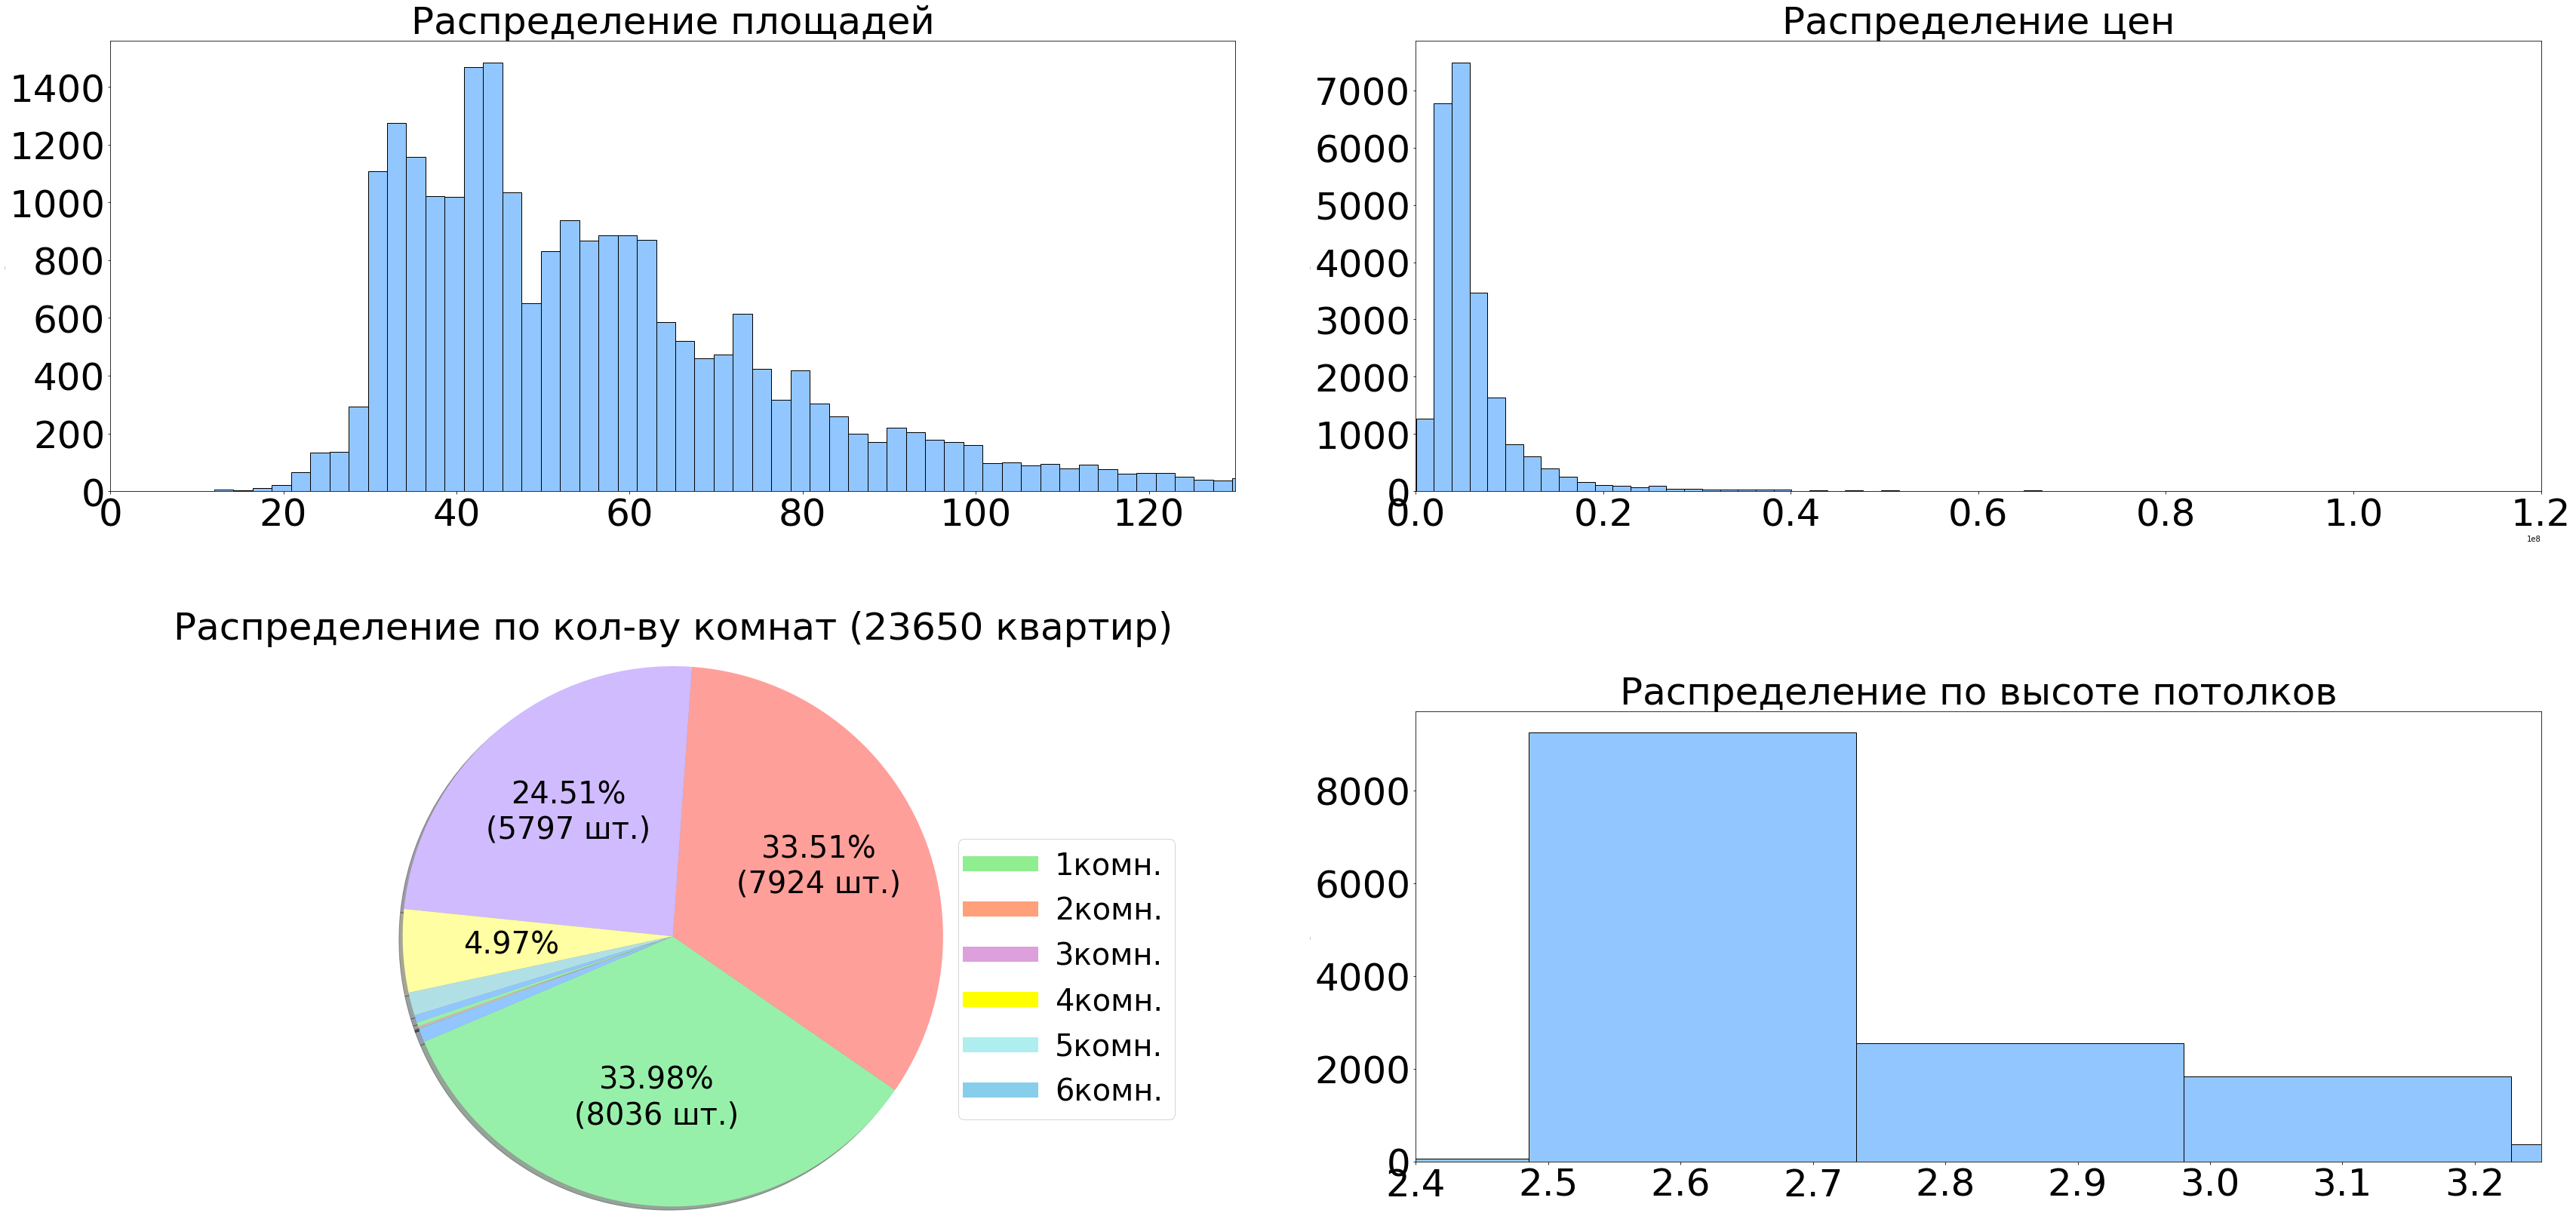

In [62]:
from matplotlib.lines import Line2D
plt.style.use('seaborn-pastel') 

rooms_pivot = df.pivot_table(index='number_of_rooms', values='last_price', aggfunc='count')

df_list = [df['total_area_m2'], df['last_price'], df['number_of_rooms'], df['ceiling_height_m']]
df_titles_list = ['Распределение площадей', 'Распределение цен', 
                  'Распределение по кол-ву комнат (23650 квартир)', 'Распределение по высоте потолков']
xlims_list = [130, 120000000, 12, 3.25]
nrow = 2
ncol = 2

def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    if value > 5000:
        return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    elif value > 1000:
        return "{:.2f}%".format(pct)
    else:
        return ''

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(50,25))
count = 0
for r in range(nrow):
    for c in range(ncol):
        if df_titles_list[count] == 'Распределение по кол-ву комнат (23650 квартир)':
            sum_filt_aparts = rooms_pivot.sum()
            data_for_pct = rooms_pivot
            ax = rooms_pivot.plot(kind='pie', y="last_price", labels=None,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_filt_aparts),
                                                            radius=1.5, shadow=True, startangle=200, fontsize=40,
                                                            title=df_titles_list[count], legend=True, 
                                                            pctdistance=0.6, labeldistance=0.5, ax=axes[r,c])
            custom_lines = [Line2D([0], [0], color='lightgreen', lw=20),
                            Line2D([0], [0], color='lightsalmon', lw=20),
                            Line2D([0], [0], color='plum', lw=20),
                            Line2D([0], [0], color='yellow', lw=20),
                            Line2D([0], [0], color='paleturquoise', lw=20),
                            Line2D([0], [0], color='skyblue', lw=20)]
            ax.title.set_size(50)
            ax.title.set_position([0.5, 1.15])
            ax.set_ylabel('')
            ax.legend(custom_lines, ['1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':40})
            plt.tight_layout(pad=10)
        else:
            ax = df_list[count].plot(kind='hist', bins=400, fontsize=50, title=df_titles_list[count], 
                                     ec='black', ax=axes[r,c])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.title.set_position([0.5, 1.15])
            else:
                ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
        count += 1

Гистограмма "Распределение площадей": Большая часть квартир имеет метраж от 30 до 80 кв.м., пик приходится на 50 кв.м. Есть квартиры и по 800м, но это единичные выбросы.
Гистограмма "Распределение цен": цена на квартиры лежит в промежутке от 3 до 12 млн. Большаячасть квартир продается за цену в промежутке между 3 и 6 млн. Опять же, есть выбросы, но ничего.
Круговая диаграмма "Распределение по количеству комнат": 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их процент сильно ниже.
Гистограмма "Распределение по высоте потолков": квартиры, в большинстве своем, имеют потолки от 2,5-2,75м (самый популярный вариант) до 3,2м. Остальные случаи - эксклюзивы.

Разберем данные и гистограмму по времени продажи квартиры:

In [63]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,"20,470.00"
mean,180.75
std,219.78
min,1.00
25%,45.00
50%,95.00
75%,231.00
max,"1,580.00"


In [64]:
df['days_exposition'].median()

95.0

Среднее время продажи - полгода, 180 дней. Медианное - 95 дней.
3 месяца для продажи квартиры в целом объективный срок.
Есть квартиры, которые продавались 5 лет скорее всего это брак данных или же очень не удачные варианты.

Посмотрим распределение:

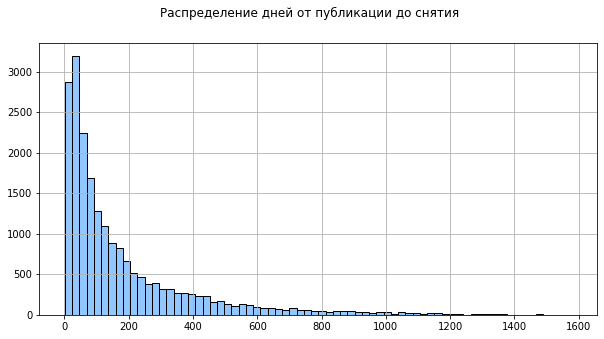

In [65]:
plt.suptitle("Распределение дней от публикации до снятия")
df['days_exposition'].hist(bins=70, figsize=(10,5), ec='black')

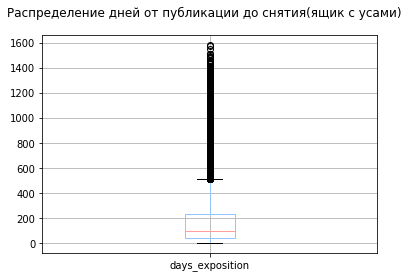

In [66]:
plt.suptitle("Распределение дней от публикации до снятия(ящик с усами)")
df.boxplot(column='days_exposition')

Большая часть квартир продавалась в течение первых 50 дней, все в рамках распределения.
Ограничим срок продажи 365 днями (посмотрим в разрезе 1 года), чтоб убрать выбросы. Посмотрим на данные более детально:

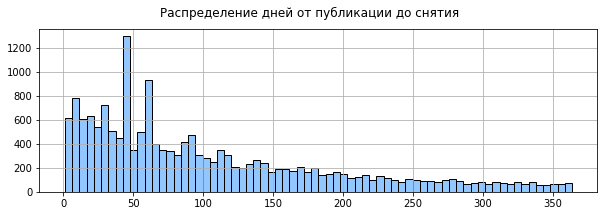

In [67]:
plt.suptitle("Распределение дней от публикации до снятия")
df.query('days_exposition<365')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

В целом картина таже, чаще всего квартиры продаются в срок от 40 до 60 дней.

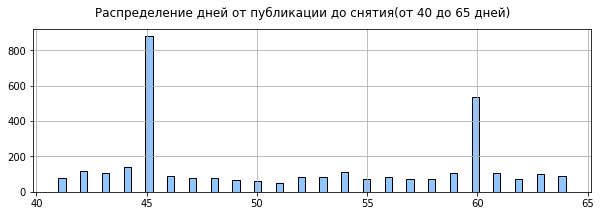

In [68]:
plt.suptitle("Распределение дней от публикации до снятия(от 40 до 65 дней)")
df.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

Странные пики, возможно, что сделки закрываются следующим образом: раз в 15 дней или же сбор статистики коррелируется с отчетностью взятой раз в две недели

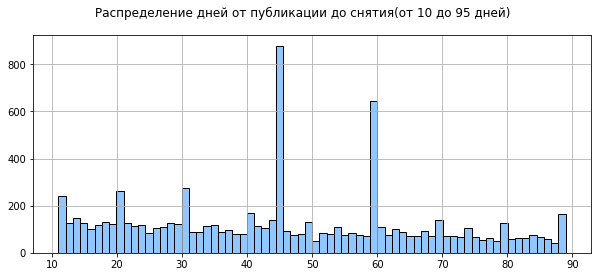

In [69]:
plt.suptitle("Распределение дней от публикации до снятия(от 10 до 95 дней)")
df.query('10<days_exposition<90')['days_exposition'].hist(bins=70, figsize=(10,4), ec='black')

Видимо так оно и есть.
Продолжим:

Для прорисовки графиков зависити цен, напишем функцию:

In [70]:
def depend_price(df, column):
    title_dict = {'number_of_rooms': 'Зависимость цены от количества комнат', 'floor': 'Зависимость цены от этажа',
                  'day_of_week_exposition':'Медиана цен по дням недели', 'month_exposition': 'Медиана цен по месяцам',
                  'year_exposition': 'Медиана цен по годам', 
                  'cityCenters_nearest_kms': 'Зависимость цены от удаленности от центра города'}
    plt.style.use('seaborn-pastel')
    if column == 'floor' or column == 'city_center_distance_km':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'city_center_distance_km':
        fontsize = 12
    else:
        fontsize = 20
    df_filtered = df.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(16,4))
    ax2 = plt.gca() 
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_nearest_kms':
        plt.xticks(rotation=0)
    return plot


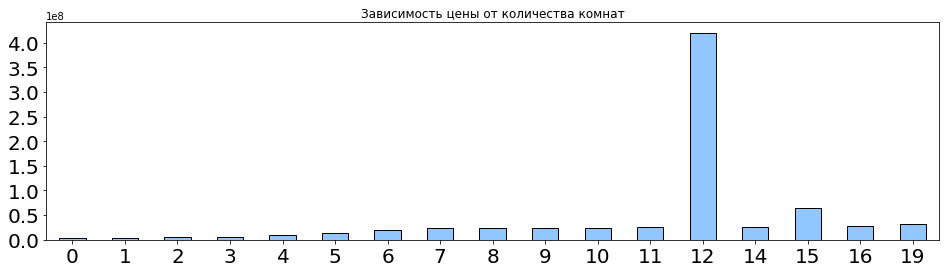

In [71]:
depend_price(df, 'number_of_rooms')

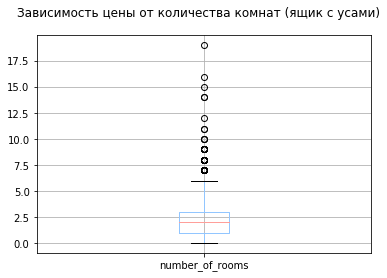

In [72]:
plt.suptitle("Зависимость цены от количества комнат (ящик с усами)")
df.boxplot(column='number_of_rooms')

Отсечем выбросы:

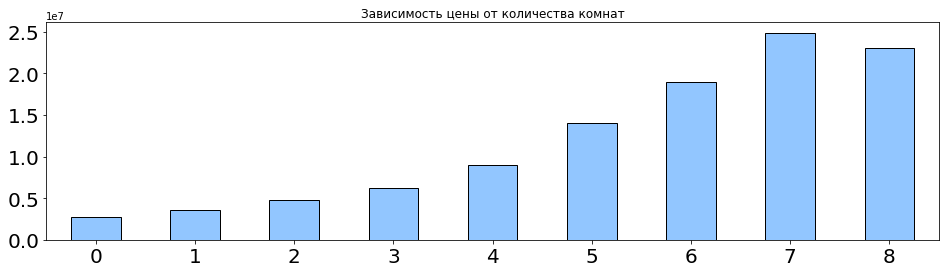

In [73]:
depend_price(df.query('number_of_rooms <= 8'), 'number_of_rooms')

Чем больше комнат, тем выше цена - так продолжается до 7 комнат. Далее - единичные значения (выбросы). Возможно, что дальше идут бывшие коммуналки на продажу.
Теперь берёмся за этажи (по категориям: 'первый', 'последний', 'другой'):

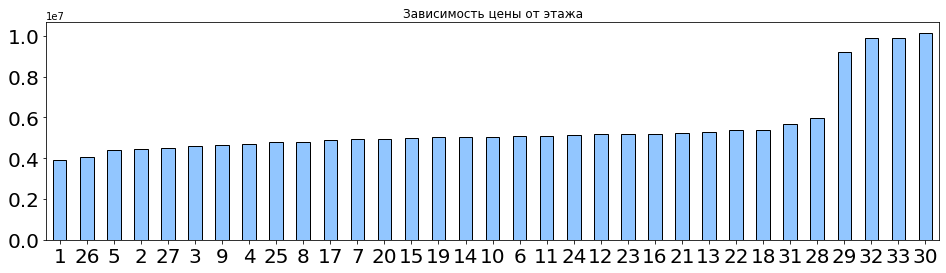

In [74]:
depend_price(df, 'floor')

Посмотрим детальней:

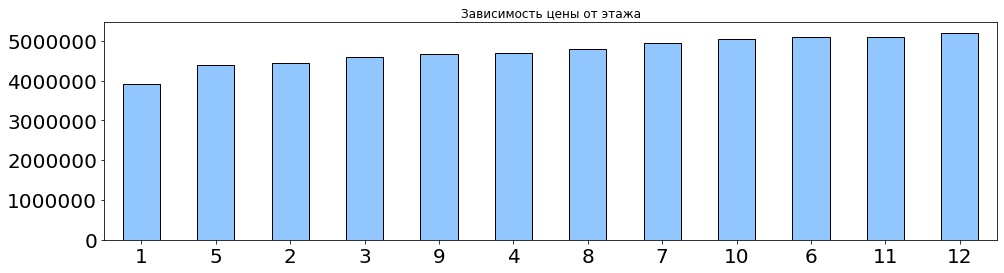

In [75]:
depend_price(df.query('floor <= 12'), 'floor')

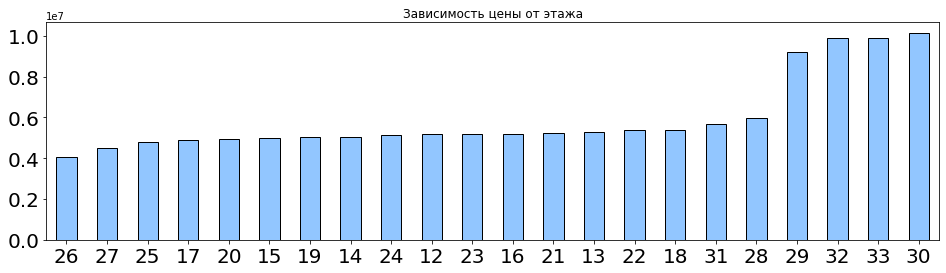

In [76]:
depend_price(df.query('floor >= 12'), 'floor')

Цены на квартиры на 1ом этаже в среднем на %15 ниже, чем цены на квартиры, расположенные на других этажах. Стоит отметить особо выделяются пентхаусы.

Построим график зависимости средней цены от дня недели, месяца и года публикации объявления:

In [77]:
def dmy_price(df, ylims=None):
    dmy_to_plot = ['day_of_week_exposition', 'month_exposition', 'year_exposition']
    titles = ['Медиана цен по дню недели', 'Медиана цен по месяцу', 'Медиана цен по году']

    for i in range(len(dmy_to_plot)):
        df_to_plot = df.groupby(dmy_to_plot[i]).median()['last_price'].reset_index().sort_values(by=dmy_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(20,5), ec='black',
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = df_to_plot.plot(x=dmy_to_plot[i], y="last_price", kind='bar', figsize=(20,5), ec='black',
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if dmy_to_plot[i] != 'day_of_week_exposition':
            plt.xticks(rotation=0)
    return plot

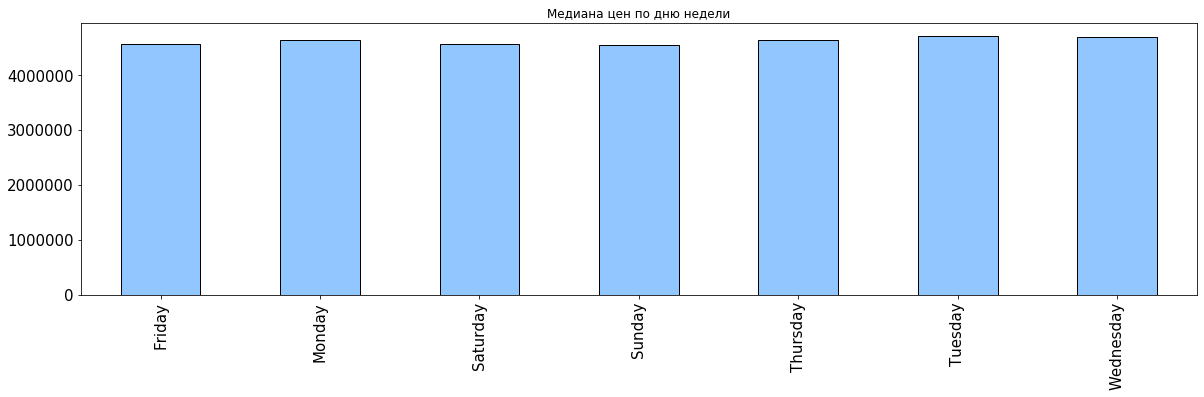

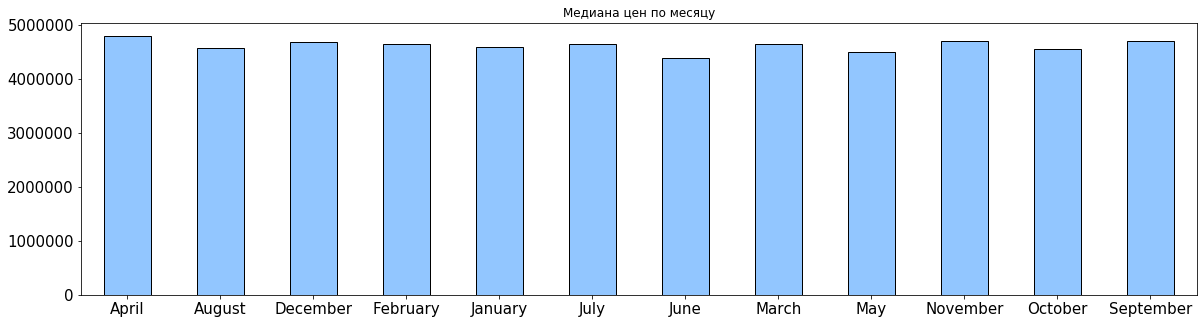

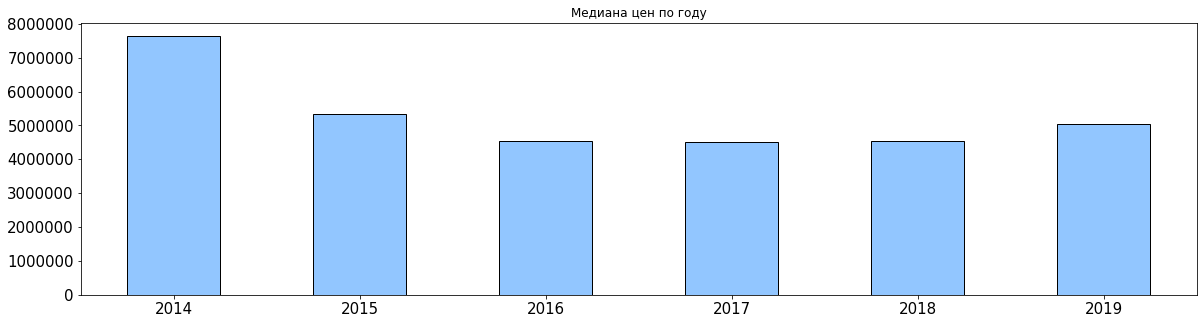

In [78]:
dmy_price(df)

Увеличим размеры каждого графика по вертикали и ограничим каждый график по оси Oy интервалом значений (4300000, 4900000) для дня недели и месяца и (4000000, 8000000) для года:

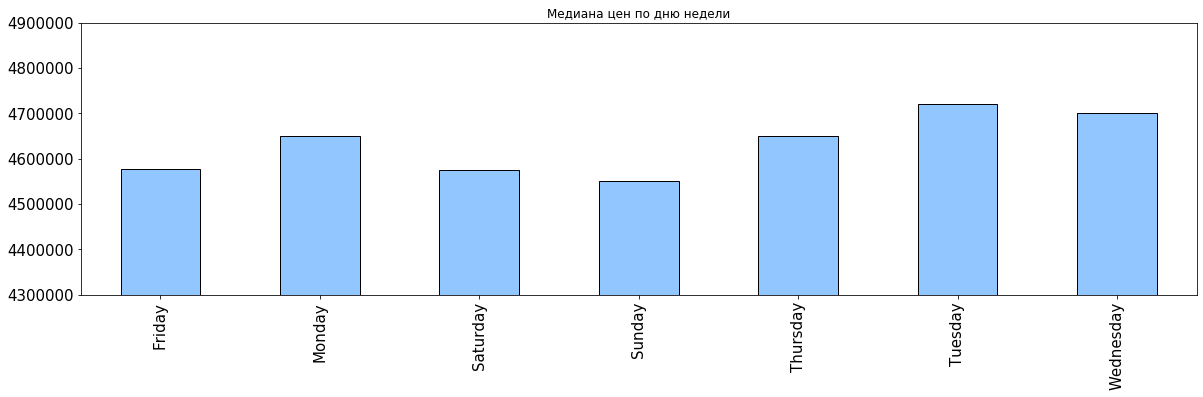

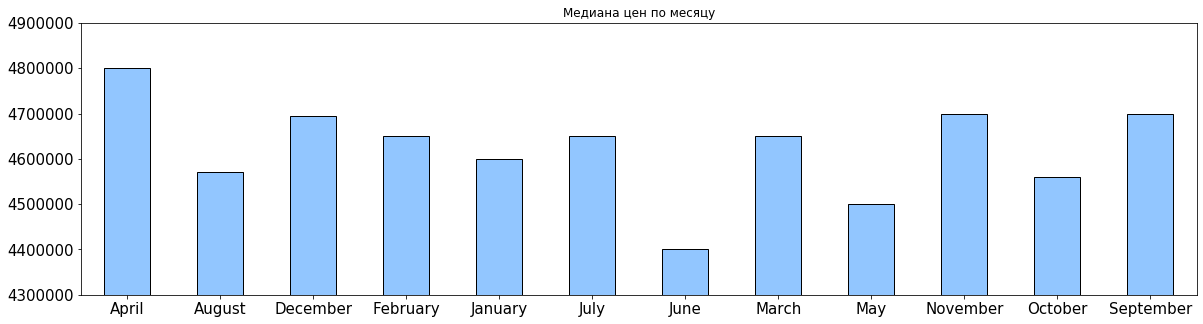

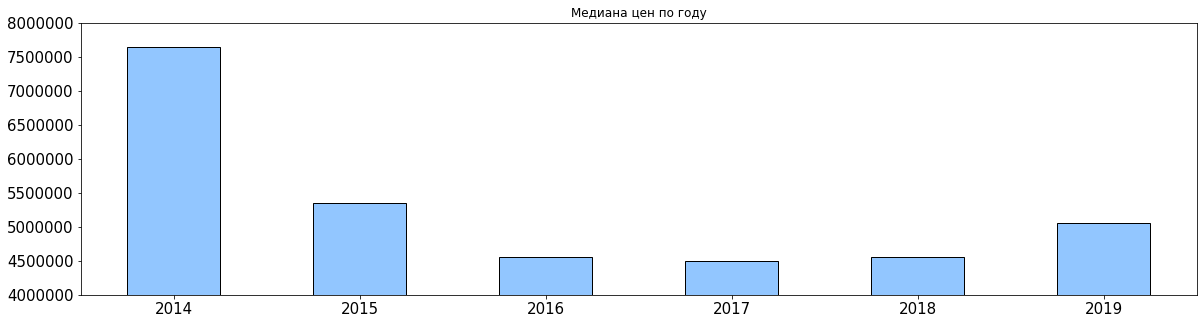

In [79]:
dmy_price(df=df, ylims=[(4300000, 4900000), (4300000, 4900000), (4000000, 8000000)])

- Зависимость цены от дня недели публикации практически никак не зависит. Единственное, что можно сказать, так это то, что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни;
- Зависимость цены от месяца публикации - апрель оказался самым "деловым": цены на квартиры, чьи объявления о продаже были опубликованы в апреле, выше, чем по остальным месяцам. Особенно выделяется медиана цен на квартиры по июньским объявлениям - довольно низкие в сравнении с другими месяцами;
- Зависимость цены от года публикации - 2014г. тут очень выделяется. Рассмотрим его чуть подробнее (по месяцам) и сделаем общий вывод про зависимость цены от года публикации:

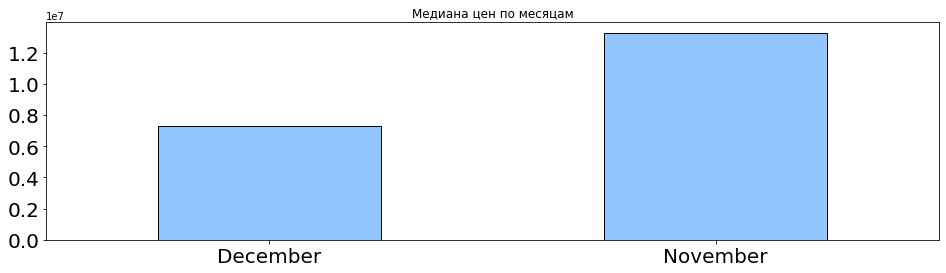

In [80]:
depend_price(df.query('year_exposition == 2014'), 'month_exposition')

При выборке видно, что в наших данных есть информация только о ноябре и декабре 2014 года (и позднее). Возможно, что такие высокие цены были вызваны ажиотажем на рынке недвижимости, вызванным довольно скоротечным ослаблением рубля. По этой причине, спрос мог превышать предложение, отсюда и стоимость на квартиры. К декабрю всё пошло на убыль. В 2019г. цена стала опять расти. Скорее всего это связано с тем, что после 5 лет застоя рынок недвижимости оживился, поспособствовала увеличение потребительнской способности.

удалим редкие аномалии используем данные с <a href='https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%81%D0%B0%D0%BC%D1%8B%D1%85_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B9_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0'>википедии</a>   (врядли же в Лахта центре продают квартиры)

In [81]:
df.drop(index=df.query('total_floors_in_house >=45').index, axis=0, inplace=True)

удалим редкие аномалии используем данные с <a href='https://zen.yandex.ru/media/mirkvartir/tri-samyh-malenkih-kvartiry-peterburga-skolko-oni-stoiat-i-kak-vygliadiat-5f2f016f7436c00ecf936c62'>ЯндексДзен</a>   (кто же вообще покупает такие малютки) 

In [82]:
df.drop(index=df.query('living_area_m2 < 10').index, axis=0, inplace=True)

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья:

In [83]:
top10 = df['town_name'].value_counts().index.tolist()[:10]
mean10_metrics = [df[df['town_name'] == city]['price_per_meter'].median().round(2) for city in top10]
mean10_prices = [df[df['town_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_metrics, 'Средняя цена за квартиру, тыс. руб.': mean10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,"104,750.00","5,500,000.00"
4,Пушкин,"100,000.00","5,180,000.00"
8,деревня Кудрово,"91,860.47","3,790,000.00"
6,поселок Парголово,"91,642.86","4,100,000.00"
1,поселок Мурино,"85,714.29","3,400,000.00"
2,поселок Шушары,"76,923.08","3,950,000.00"
5,Колпино,"74,723.74","3,600,000.00"
7,Гатчина,"67,796.61","3,100,000.00"
3,Всеволожск,"65,789.47","3,450,000.00"
9,Выборг,"58,158.32","2,897,000.00"


Как и ожидалось, самые дорогие квартиры (что за всё жилье, что за 1 кв.м.) в Санкт-Петербурге и парковом городе Пушкине. Чем дальше от города, тем дешевле. В Выборге средняя цена за квадратный метр в 2 раз ниже, чем в Санкт-Петербурге.

Продолжим изучение предложений. Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Цель — выяснить, какая область входит в центр. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [84]:
import warnings

warnings.filterwarnings('ignore')
df_spb = df.query('town_name == "Санкт-Петербург"')
df_spb.loc[:, 'cityCenters_nearest_kms'] = (df_spb.loc[:, 'city_center_distance_km']).round()
df_spb.head()

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,parks_numbers_within_3km,ponds_number_within_3km,days_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio,cityCenters_nearest_kms
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,0.00,Санкт-Петербург,1.00,2.00,nan,Thursday,March,2019,16.03,18.86,0.48,0.76,другой,"120,370.37",0.47,0.23,16.00
2,10,"5,196,000.00",56.00,2015-08-20,2,nan,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,1.00,2.00,558.00,Thursday,August,2015,13.93,21.74,0.09,0.57,другой,"92,785.71",0.61,0.15,14.00
3,0,"64,900,000.00",159.00,2015-07-24,3,nan,14.00,nan,9,0,0,0,9.10,0.00,Санкт-Петербург,2.00,3.00,424.00,Friday,July,2015,6.80,28.10,0.08,0.23,другой,"408,176.10",nan,0.06,7.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,0,0,0,41.00,0.00,Санкт-Петербург,2.00,1.00,121.00,Tuesday,June,2018,8.10,31.86,0.11,0.05,другой,"100,000.00",0.32,0.41,8.00
7,5,"7,915,000.00",71.60,2019-04-18,2,nan,24.00,nan,22,0,0,0,18.90,2.00,Санкт-Петербург,0.00,0.00,nan,Thursday,April,2019,11.63,23.98,0.49,0.52,другой,"110,544.69",nan,0.26,12.00


Строим график медианной цены в зависимости от удаленности от города:

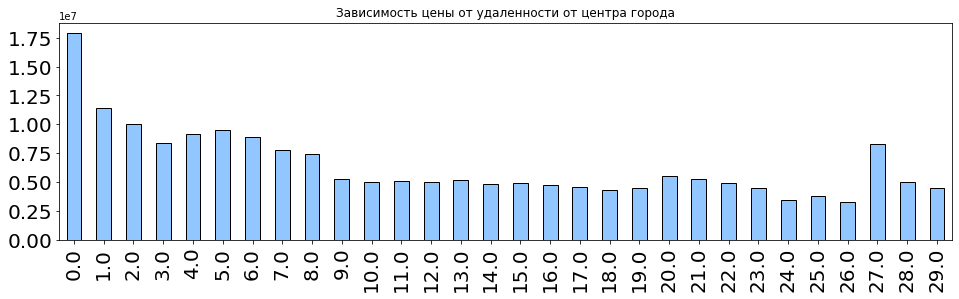

In [85]:
depend_price(df_spb, 'cityCenters_nearest_kms')

Очевидно, что в самом центре (в радиусе до 1 км) медианная цена на квартиру стремится к 20 млн р. Если опираться на резкое падение цены по графику, то центр ограничен радиусом в 8 км, далее медианная цена довольно заметно падает. Однако, цены на 4-7км сравнимы с ценами на квартиры, расположенные в 2 км от центра. Предполагаю, что это влияние на чуть более высокую, чем ожидалось, медианную цену оказывают определенные районы типа Василеостровского, Приморского и Петроградского, которые не считаются центральными, но при этом считаются достаточно элитными.

In [86]:
df_spb.query('cityCenters_nearest_kms > 17').sort_values(by='cityCenters_nearest_kms', ascending=False)

,total_images,last_price,total_area_m2,first_day_exposition,number_of_rooms,ceiling_height_m,total_floors_in_house,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,number_of_balconies,town_name,parks_numbers_within_3km,ponds_number_within_3km,days_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status,price_per_meter,total_living_area_ratio,total_kitchen_area_ratio,cityCenters_nearest_kms
13031,16,"4,200,000.00",56.80,2018-07-04,2,3.50,3.00,27.90,1,0,0,0,10.80,0.00,Санкт-Петербург,0.00,0.00,187.00,Wednesday,July,2018,29.34,25.92,0.49,0.52,первый,"73,943.66",0.49,0.19,29.00
16787,20,"4,850,000.00",85.80,2019-04-22,3,3.60,3.00,49.40,2,0,0,0,12.00,0.00,Санкт-Петербург,0.00,0.00,nan,Monday,April,2019,29.26,25.84,0.49,0.52,другой,"56,526.81",0.58,0.14,29.00
19892,20,"4,370,000.00",54.70,2016-03-23,3,2.50,5.00,32.80,5,0,0,0,7.10,1.00,Санкт-Петербург,0.00,0.00,939.00,Wednesday,March,2016,28.81,14.23,0.49,0.52,последний,"79,890.31",0.60,0.13,29.00
10798,10,"4,850,000.00",62.00,2017-05-16,3,nan,5.00,35.70,1,0,0,0,7.50,2.00,Санкт-Петербург,0.00,0.00,63.00,Tuesday,May,2017,28.64,14.07,0.49,0.52,первый,"78,225.81",0.58,0.12,29.00
11652,16,"4,700,000.00",51.00,2016-06-07,2,2.60,5.00,30.00,1,0,0,0,8.00,0.00,Санкт-Петербург,0.00,0.00,539.00,Tuesday,June,2016,28.64,14.07,0.49,0.52,первый,"92,156.86",0.59,0.16,29.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,7,"4,400,000.00",36.00,2018-01-10,1,2.50,14.00,20.00,3,0,0,0,6.00,0.00,Санкт-Петербург,0.00,0.00,28.00,Wednesday,January,2018,17.86,45.14,0.49,0.52,другой,"122,222.22",0.56,0.17,18.00
12154,7,"3,999,000.00",35.60,2018-11-28,1,2.50,14.00,17.50,14,0,0,0,8.00,0.00,Санкт-Петербург,0.00,0.00,nan,Wednesday,November,2018,17.86,45.14,0.49,0.52,последний,"112,331.46",0.49,0.22,18.00
12120,9,"3,200,000.00",33.40,2017-04-18,1,nan,9.00,20.26,5,0,0,0,5.40,0.00,Санкт-Петербург,1.00,0.00,195.00,Tuesday,April,2017,17.59,17.68,0.58,0.52,другой,"95,808.38",0.61,0.16,18.00
167,11,"3,750,000.00",35.10,2019-04-08,1,2.75,23.00,15.90,1,0,0,0,9.80,0.00,Санкт-Петербург,0.00,1.00,nan,Monday,April,2019,17.64,22.31,0.49,0.07,первый,"106,837.61",0.45,0.28,18.00


Возможно, что центр мог считаться не историческим центром Санкт-Петербурга, а какой-либо другой точкой, или же расстояние считалось не по прямой, а по дорогам. А может быть, это Кронштадт, который считается Санкт-Петербургом. Особенно если посмотреть на 27 км от центра, где цены от жилья неожиданно высокие по сравнению с соседними значениями - могут сравниться с ценами в пределах центральной зоны Санкт-Петербурга. В том или ином случае, оставим это как есть, раз информация уже присутствовала в таблице. Тем более, квартир с такими параметрами не так много.

Выделим сегмент квартир в центральной зоне (до 8 км включительно) и проанализируем эту территорию - изучим следующие параметры:
- площадь;
- цена;
- число комнат;
- высота потолков.

In [87]:
df_in_center = df_spb.query('cityCenters_nearest_kms <= 8')
print('Выборка квартир в центральной зоне Санкт-Петербурга -', df_in_center.shape[0], 'квартир')

Выборка квартир в центральной зоне Санкт-Петербурга - 4114 квартир


Сначала построим такие же гистограммы распределения для площади, цены, числа комнат и круговую диаграмму для высоты потолков (используем те же лимиты по Ox, которые использовали при построении данных для всего датафрейма):

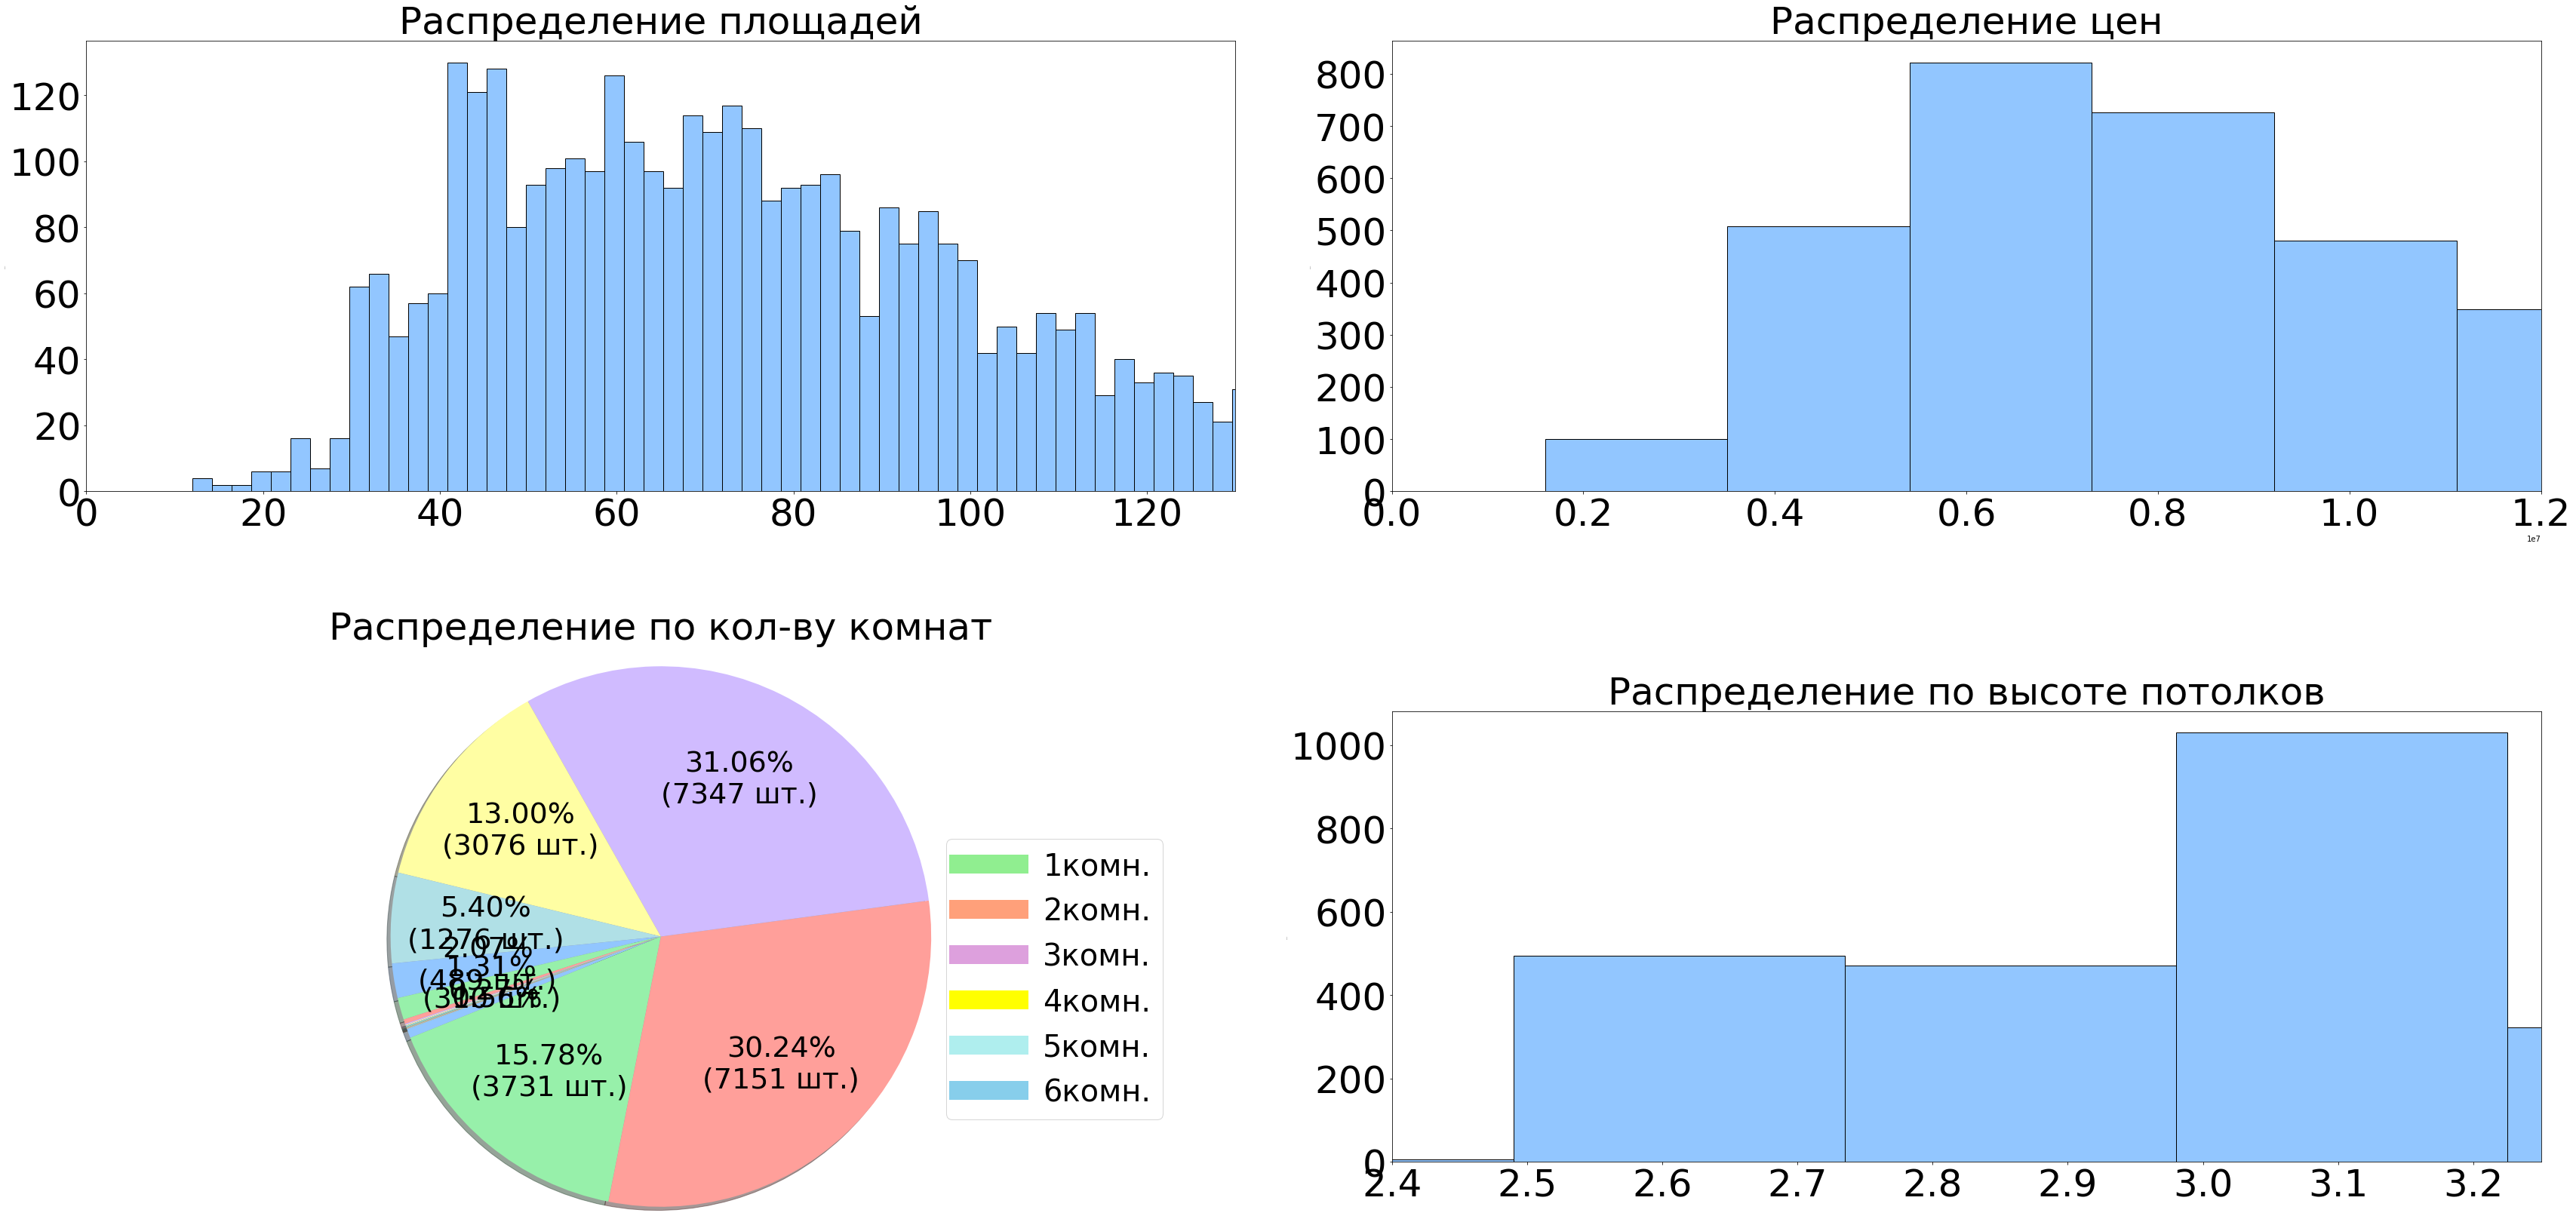

In [88]:
df_in_center_rooms_pivot = df_in_center.pivot_table(index='number_of_rooms', values='last_price', aggfunc='count')
df_list = [df_in_center['total_area_m2'], df_in_center['last_price'], 
           df_in_center['number_of_rooms'], df_in_center['ceiling_height_m']]
df_titles_list = ['Распределение площадей', 'Распределение цен', 
                  'Распределение по кол-ву комнат', 'Распределение по высоте потолков']
xlims_list = [130, 12000000, 12, 3.25]

def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    if value > 220:
        return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    elif value > 60:
        return "{:.2f}%".format(pct)
    else:
        return ''

ncol = 2
nrow = 2
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(50,25))
line_1 = 'выборка'
count = 0
for r in range(nrow):
    for c in range(ncol):
        if df_titles_list[count] == 'Распределение по кол-ву комнат':
            data_for_pct = df_in_center_rooms_pivot
            sum_filt_df = df_in_center_rooms_pivot.sum()
            ax = df_in_center_rooms_pivot.plot(kind='pie', y="last_price", 
                                                            radius=1.5, shadow=True, startangle=200, fontsize=38,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_filt_aparts),
                                                            title=df_titles_list[count], legend=True, labels=None,
                                                            pctdistance=0.65, labeldistance=0.5, ax=axes[r,c])
            custom_lines = [Line2D([0], [0], color='lightgreen', lw=25),
                            Line2D([0], [0], color='lightsalmon', lw=25),
                            Line2D([0], [0], color='plum', lw=25),
                            Line2D([0], [0], color='yellow', lw=25),
                            Line2D([0], [0], color='paleturquoise', lw=25),
                            Line2D([0], [0], color='skyblue', lw=25)]
            ax.title.set_size(50)
            ax.title.set_position([0.5, 1.15])
            ax.set_ylabel('')
            ax.legend(custom_lines, ['1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':40})
            plt.tight_layout(pad=10)
        else:
            ax = df_list[count].plot(kind='hist', bins=400, fontsize=50, title=df_titles_list[count], 
                                     ec='black', ax=axes[r,c])
            if count == 3:
                ax.set_xlim(2.4, xlims_list[count])
                ax.title.set_position([0.5, 2.15])
            else:
                ax.set_xlim(0, xlims_list[count])
            ax.title.set_size(50)
            ax.yaxis.label.set_size(0)
        count += 1

Гистограмма "Распределение площадей": Большая часть квартир имеет метраж от 50 до 100 кв.м., пиков много, основные - 60, 70 и 90 кв.м.
Гистограмма "Распределение цен": цена на квартиры лежит, в основном, в промежутке от 4,5 до 12 млн р. Большая часть квартир продается за цену в промежутке между 7,5 и 10 млн р.
Круговая диаграмма "Распределение по количеству комнат": Больше всего 2- и 3комнатных квартир, чуть меньше - 4хкомнатных. Однокомнатных вообще почти нет (всего 6%) от общего количества.
Гистограмма "Распределение по высоте потолков": квартиры, в большинстве своем, имеют потолки 3,25м. Ещё некоторые квартиры имеют высоту потолков от 2,75 до 3,5м. Ниже, выше - редкость.

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).Исследуем зависимость цены на квартиру в центральной зоне Санкт-Петербурга от количества комнат:

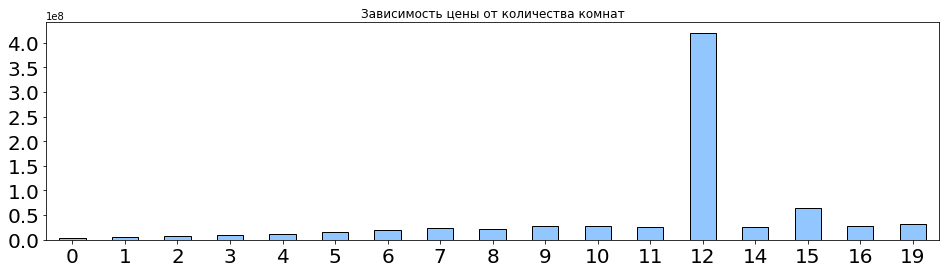

In [89]:
depend_price(df_in_center, 'number_of_rooms')

Ограничимся 6 комнатами, как при работе со всем датафреймом:

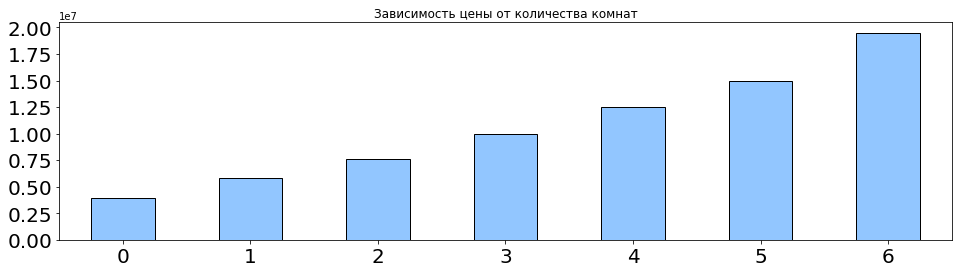

In [90]:
depend_price(df_in_center.query('number_of_rooms <= 6'), 'number_of_rooms')

Чем больше комнат, тем выше цена.

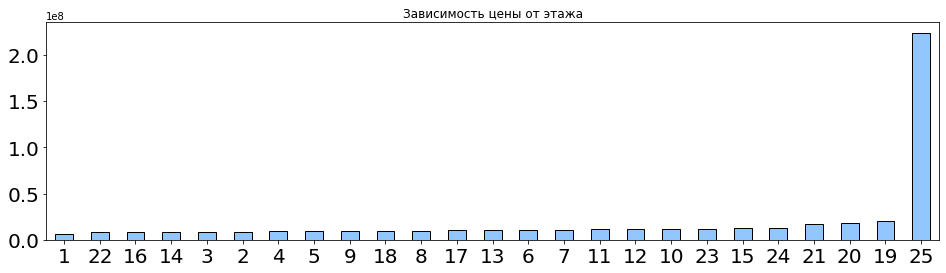

In [91]:
depend_price(df_in_center, 'floor')

Все так же логично, 1 этаж самый доступный вариант.

Зависимость цены от удаленности от центра (в пределах центральной зоны города):

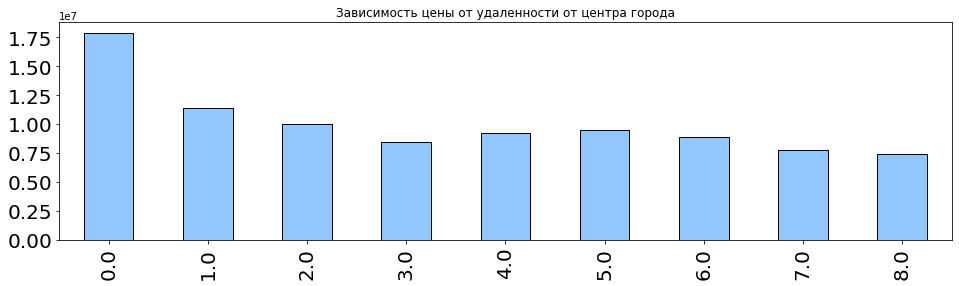

In [92]:
depend_price(df_in_center, 'cityCenters_nearest_kms')

Чем дальше от центра, тем дешевле.

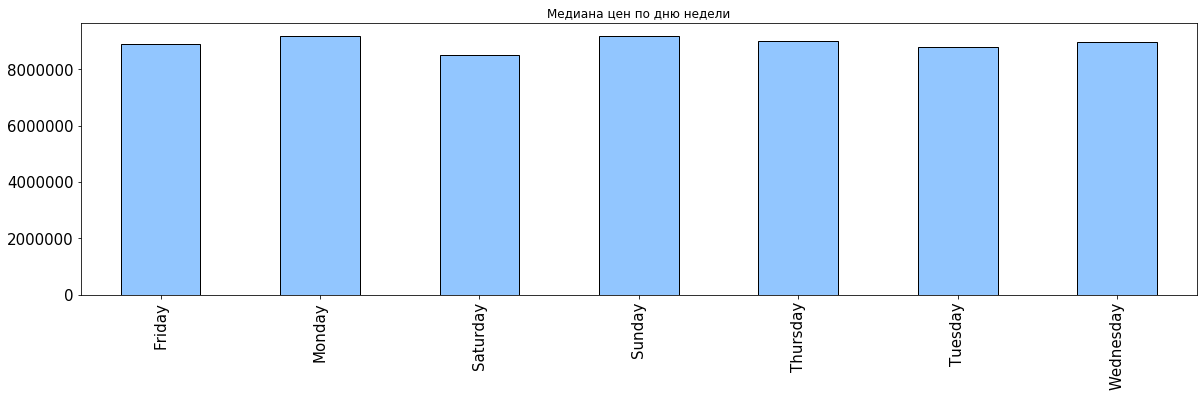

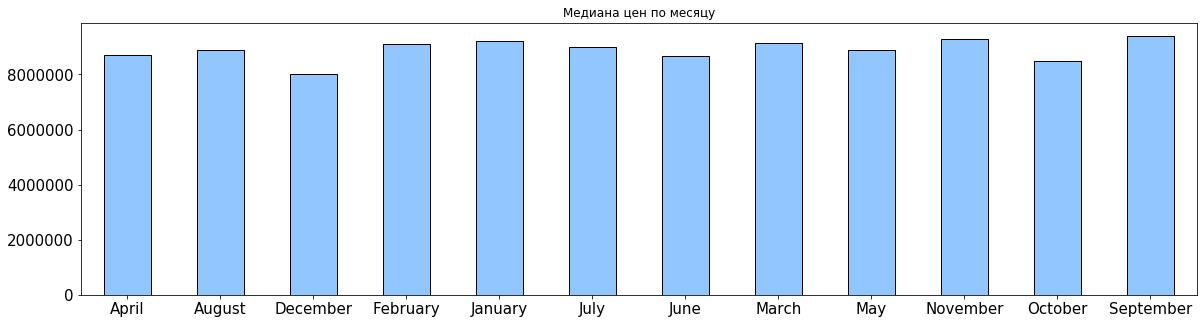

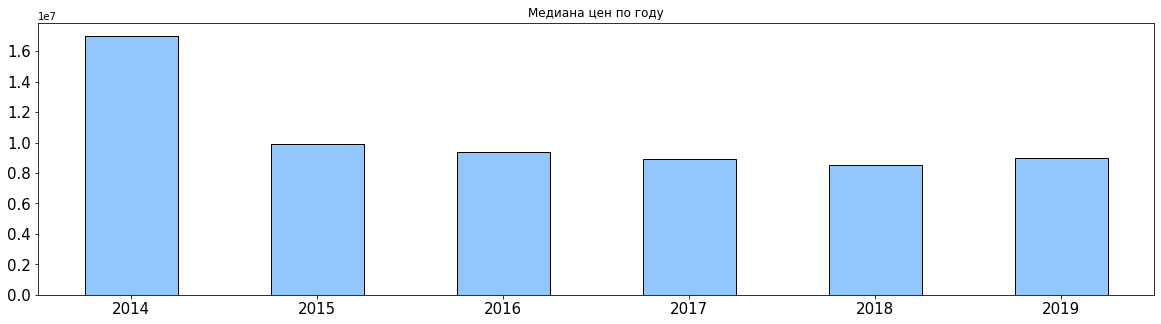

In [93]:
dmy_price(df_in_center)

Цена квартиры от дня недели, когда опубликовали объявление о продаже, почти не зависит. Зависимость по месяцу и году опубликованя объявления есть - такая же, как и по всем данным.

Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену:

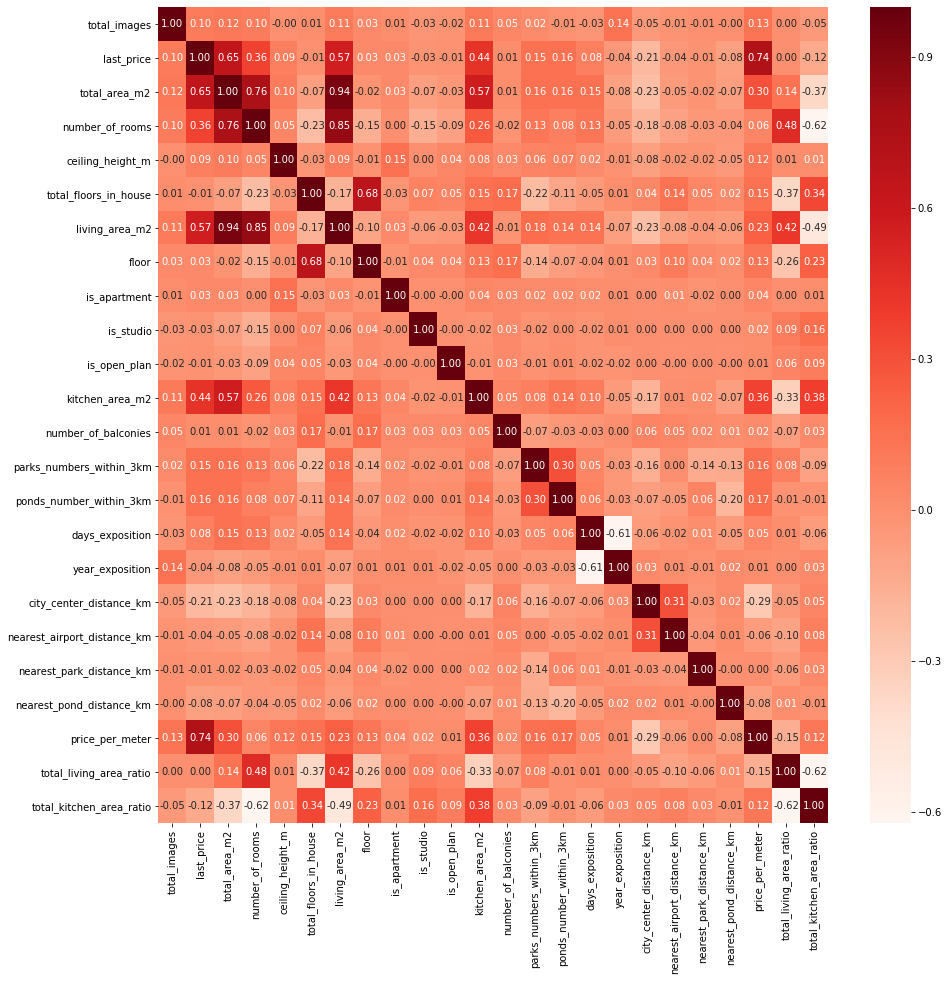

In [94]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="Reds", fmt='.2f')

Выделим только столбец last_price, чтоб детальней рассмотреть влияние различных параметров именно на цену:

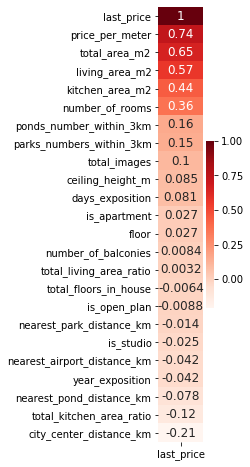

In [95]:
plt.figure(figsize=(1,8))
sns.heatmap(df.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Reds", 
            annot=True, annot_kws={'size':12})

Cильнее всего цена на квартиру зависит от цены за квадратный метр (практически очевидно), от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а также от количества комнат. Небольшое влияние оказывает присутствие парков/водоемов рядом.Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена. Ожидаемо. Таким же образом небольшое влияние оказывает удаленность от аэропорта. Многие из этих параметров оказывают довольно слабое влияние, но если попробовать их объединить в одну группу, то, наверняка, можно будет построить хорошую предсказательную модель.

 <a id='step5'></a>
# Шаг 5. Общий вывод

Сделаем общие выводы и на основе данных, и на основе графиков.
Чем больше площадь квартиры, тем выше цена, чем больше цена за квадратный метр, тем выше цена. Чем выше доля жилой площади/площадь кухни, тем выше цена. Чем больше комнат, тем выше цена На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных. Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных. Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные. Квартиры, размещенные к продаже в летние месяцы и в октябре, в среднем дешевле, чем размещенные в любые другие месяца. В начале и в конце года цены стабильные и высокие. Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - рецессия экономики - цены пошли вверх впервые после наступления кризиса.